# CSP AI Survey Completion Analysis (Sept 2025)

This notebook analyzes survey completion rates for the CSP AI Use and Confidence survey, with breakdown by manager to identify areas needing follow-up.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Create outputs directory if it doesn't exist
Path('../outputs/survey').mkdir(parents=True, exist_ok=True)

# Generate date suffix for output files (format: YYYY_MM_DD)
date_suffix = datetime.now().strftime('%Y_%m_%d')
print(f"Date suffix for output files: {date_suffix}")

Date suffix for output files: 2025_10_03


## 1. Load and Merge Data

In [8]:
# Load people and manager mapping (only Name and Manager columns needed)
people_df = pd.read_csv('../data/CSP AI Culture and Learning_ Tracking - People and AI Info_2025-10-01.csv')
people_df = people_df[['Name', 'Manager', 'email']].copy()  # Keep only relevant columns
print(f"Total people in team: {len(people_df)}")
print(f"Columns: {list(people_df.columns)}")
people_df.head()

Total people in team: 215
Columns: ['Name', 'Manager', 'email']


,Name,Manager,email
0,Aishwarya Nirmal,Kevin Jungmeisteris,aishwarya.nirmal@airbnb.com
1,Akhil Ojha,Prerna Arya,akhil.ojha@airbnb.com
2,Aleck Landgraf,Darrick Brown,aleck.landgraf@airbnb.com
3,Alex Park,Zhiheng Xu,a.park@airbnb.com
4,Allan Beals-Gibson,Teng Wang,allan.bealsgibson@airbnb.com


In [9]:
# Load survey responses
survey_df = pd.read_csv('../data/CSP AI Use and Confidence (Sept 2025) (Responses)_2025_10_03.csv')
print(f"Total survey responses: {len(survey_df)}")
print(f"Columns: {list(survey_df.columns)[:3]}...")  # Show first 3 columns
survey_df.head()

Total survey responses: 112
Columns: ['Timestamp', 'Email Address', '1. How often do you currently use AI tools to perform your role?']...


,Timestamp,Email Address,1. How often do you currently use AI tools to perform your role?,2. In which contexts have you used AI to perform your role? (select all that apply),3. What are the primary barriers you face in applying AI in your work role?\n(select all that apply),"4. How would you rate your current comfort level with AI tools (e.g., coding assistants, data exploration, text/image generation etc.)?","5. How confident are you that you understand the strengths and limitations of AI tools (e.g., when to trust, when to validate, what AI can do, and what AI can't do)","6. How well do you understand the risks (e.g., security, PII/IP leakage) of using AI in engineering?",7. Which areas would you like to grow your AI skills in over the next 3 months? (select all that apply),8. [Optional] What’s the most interesting or fun thing you’ve tried or have done with AI?
0,9/15/2025 8:40:42,john.sico@airbnb.com,Daily,"Coding / debugging, Writing tests, Documentati...",I'm actually good. I'm able to learn and grow ...,Advanced,5,5,Understanding AI model capabilities/limitation...,NaN
1,9/15/2025 8:57:21,darrick.brown@airbnb.com,Daily,"Documentation / summarization, Code review / v...",Lack of time,Intermediate,3,2,Using AI for coding & debugging (generate code...,I used AI to complete a real estate deal on my...
2,9/15/2025 9:30:10,tong.jiang@airbnb.com,Daily,"Coding / debugging, Writing tests, Documentati...",I'm actually good. I'm able to learn and grow ...,Advanced,4,4,"Workflow automation (scripts, CI/CD improvemen...",NaN
3,9/15/2025 9:30:38,clint.mullins@airbnb.com,Daily,"Coding / debugging, Writing tests, Documentati...",Lack of access to the right tools,Advanced,4,4,Using AI for coding & debugging (generate code...,NaN
4,9/15/2025 9:46:40,guilherme.boreki@airbnb.com,Daily,"Coding / debugging, Writing tests, Documentati...",Lack of trust in outputs,Advanced,5,5,"Documentation & summarization (auto-docs, PRD/...",I used chatgpt and other tools as my designer ...


In [10]:
# Clean and normalize email addresses for matching
people_df['email_clean'] = people_df['email'].str.lower().str.strip()
survey_df['email_clean'] = survey_df['Email Address'].str.lower().str.strip()

# Create a set of emails who completed the survey
completed_emails = set(survey_df['email_clean'].unique())
print(f"Unique respondents: {len(completed_emails)}")

Unique respondents: 112


In [11]:
# Add completion status to people dataframe
people_df['survey_completed'] = people_df['email_clean'].isin(completed_emails)

# Preview the merged data
print(f"\nCompletion Status:")
print(people_df['survey_completed'].value_counts())
people_df[['Name', 'Manager', 'email', 'survey_completed']].head(10)


Completion Status:
survey_completed
True     112
False    103
Name: count, dtype: int64


,Name,Manager,email,survey_completed
0,Aishwarya Nirmal,Kevin Jungmeisteris,aishwarya.nirmal@airbnb.com,True
1,Akhil Ojha,Prerna Arya,akhil.ojha@airbnb.com,False
2,Aleck Landgraf,Darrick Brown,aleck.landgraf@airbnb.com,True
3,Alex Park,Zhiheng Xu,a.park@airbnb.com,True
4,Allan Beals-Gibson,Teng Wang,allan.bealsgibson@airbnb.com,True
5,Andy Muldowney,Raj Rajagopal,andy.muldowney@airbnb.com,False
6,Astha Gupta,Brennan McQuerry,astha.gupta@airbnb.com,True
7,Bai Xiao,Zhong Ren,bai.xiao@airbnb.com,True
8,Baobin Ma,Yuxin Tang,baobin.ma@airbnb.com,True
9,Bhavya Vaidya,Prerna Arya,bhavya.vaidya@airbnb.com,False


## 2. Overall Completion Summary

In [12]:
# Calculate overall statistics
total_people = len(people_df)
completed_count = people_df['survey_completed'].sum()
not_completed_count = total_people - completed_count
completion_rate = (completed_count / total_people) * 100

print("=" * 50)
print("OVERALL SURVEY COMPLETION SUMMARY")
print("=" * 50)
print(f"Total team members: {total_people}")
print(f"Completed survey: {completed_count}")
print(f"Not completed: {not_completed_count}")
print(f"Completion rate: {completion_rate:.1f}%")
print("=" * 50)

OVERALL SURVEY COMPLETION SUMMARY
Total team members: 215
Completed survey: 112
Not completed: 103
Completion rate: 52.1%


## 3. Manager-Level Breakdown

In [14]:
# Calculate completion rates by manager
manager_stats = people_df.groupby('Manager').agg({
    'Name': 'count',  # Team size
    'survey_completed': 'sum'  # Number who completed
}).reset_index()

manager_stats.columns = ['Manager', 'Team_Size', 'Completed']
manager_stats['Not_Completed'] = manager_stats['Team_Size'] - manager_stats['Completed']
manager_stats['Completion_Rate'] = (manager_stats['Completed'] / manager_stats['Team_Size']) * 100

# Sort by completion rate (lowest first to identify problem areas)
manager_stats_sorted = manager_stats.sort_values('Completion_Rate')

print("\n" + "=" * 80)
print("COMPLETION RATES BY MANAGER (Sorted by Completion Rate - Lowest First)")
print("=" * 80)
print(manager_stats_sorted.to_string(index=False))
print("=" * 80)


COMPLETION RATES BY MANAGER (Sorted by Completion Rate - Lowest First)
            Manager  Team_Size  Completed  Not_Completed  Completion_Rate
       Tiffany Shao          3          0              3         0.000000
      Jeremy Werner          6          0              6         0.000000
        Prerna Arya          7          1              6        14.285714
      Raj Rajagopal         11          2              9        18.181818
         Byoung Bae          5          1              4        20.000000
       Larry Jerome          9          2              7        22.222222
           Mindy Ji          9          2              7        22.222222
       Kelvin Xiong         22          5             17        22.727273
       Claire Cheng         10          3              7        30.000000
Kevin Jungmeisteris         11          4              7        36.363636
         Danny Deng         10          4              6        40.000000
       Xiaohan Zeng          7          

In [15]:
# Identify managers with lowest completion rates
low_completion_threshold = 50.0
low_completion_managers = manager_stats_sorted[manager_stats_sorted['Completion_Rate'] < low_completion_threshold]

print(f"\n⚠️  MANAGERS WITH COMPLETION RATE < {low_completion_threshold}%:")
print("=" * 80)
if len(low_completion_managers) > 0:
    print(low_completion_managers[['Manager', 'Team_Size', 'Completed', 'Completion_Rate']].to_string(index=False))
else:
    print("None - all managers have completion rate >= 50%")
print("=" * 80)


⚠️  MANAGERS WITH COMPLETION RATE < 50.0%:
            Manager  Team_Size  Completed  Completion_Rate
       Tiffany Shao          3          0         0.000000
      Jeremy Werner          6          0         0.000000
        Prerna Arya          7          1        14.285714
      Raj Rajagopal         11          2        18.181818
         Byoung Bae          5          1        20.000000
       Larry Jerome          9          2        22.222222
           Mindy Ji          9          2        22.222222
       Kelvin Xiong         22          5        22.727273
       Claire Cheng         10          3        30.000000
Kevin Jungmeisteris         11          4        36.363636
         Danny Deng         10          4        40.000000
       Xiaohan Zeng          7          3        42.857143


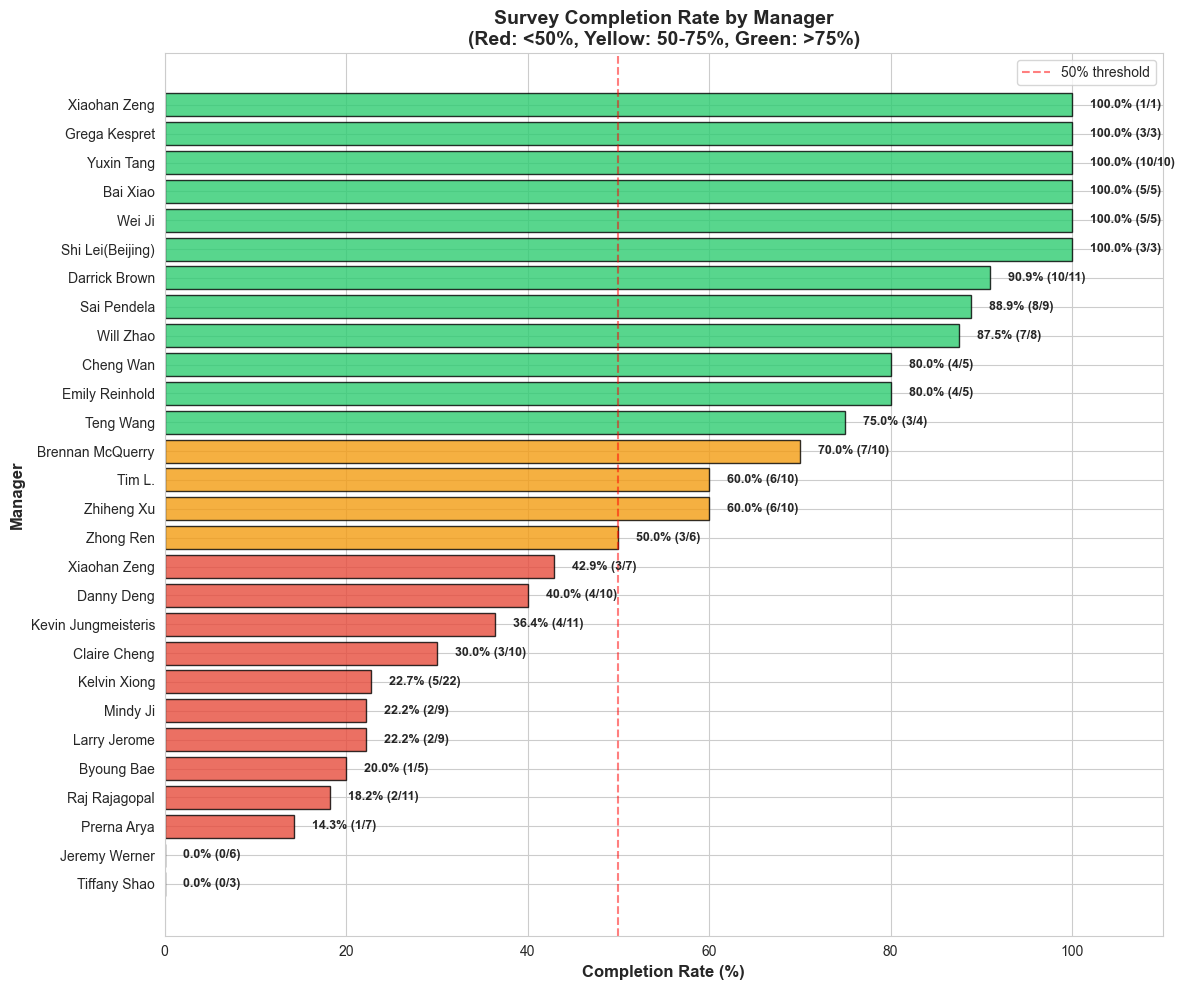

✓ Saved: ../outputs/survey/completion_by_manager_2025_10_03.png


In [16]:
# Visualize completion rates by manager
fig, ax = plt.subplots(figsize=(12, 10))

# Color code: red for low (<50%), yellow for medium (50-75%), green for high (>75%)
colors = ['#e74c3c' if rate < 50 else '#f39c12' if rate < 75 else '#2ecc71' 
          for rate in manager_stats_sorted['Completion_Rate']]

bars = ax.barh(manager_stats_sorted['Manager'], manager_stats_sorted['Completion_Rate'], 
               color=colors, alpha=0.8, edgecolor='black')

ax.set_xlabel('Completion Rate (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Manager', fontsize=12, fontweight='bold')
ax.set_title('Survey Completion Rate by Manager\n(Red: <50%, Yellow: 50-75%, Green: >75%)', 
             fontsize=14, fontweight='bold')
ax.set_xlim(0, 110)

# Add percentage labels
for i, (manager, rate, team_size, completed) in enumerate(zip(
    manager_stats_sorted['Manager'], 
    manager_stats_sorted['Completion_Rate'],
    manager_stats_sorted['Team_Size'],
    manager_stats_sorted['Completed']
)):
    ax.text(rate + 2, i, f'{rate:.1f}% ({completed}/{team_size})', 
            va='center', fontsize=9, fontweight='bold')

# Add reference line at 50%
ax.axvline(x=50, color='red', linestyle='--', linewidth=1.5, alpha=0.5, label='50% threshold')
ax.legend()

plt.tight_layout()
output_file = f'../outputs/survey/completion_by_manager_{date_suffix}.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Saved: {output_file}")

## 4. Export Results

In [ ]:
# Export manager stats to CSV
output_file = f'../outputs/survey/completion_by_manager_{date_suffix}.csv'
manager_stats_sorted.to_csv(output_file, index=False)
print(f"✓ Saved: {output_file}")

# Export list of people who haven't completed the survey (by manager)
not_completed = people_df[~people_df['survey_completed']][['Name', 'Manager', 'email']].sort_values('Manager')
output_file = f'../outputs/survey/not_completed_list_{date_suffix}.csv'
not_completed.to_csv(output_file, index=False)
print(f"✓ Saved: {output_file} ({len(not_completed)} people)")

# Export summary statistics (CSV format)
summary = pd.DataFrame({
    'Metric': ['Total Team Members', 'Survey Completed', 'Not Completed', 'Overall Completion Rate (%)', 
               'Number of Managers', 'Managers with <50% completion'],
    'Value': [total_people, completed_count, not_completed_count, round(completion_rate, 1),
              len(manager_stats), len(low_completion_managers)]
})
output_file = f'../outputs/survey/overall_summary_{date_suffix}.csv'
summary.to_csv(output_file, index=False)
print(f"✓ Saved: {output_file}")

# Export formatted summary (TXT format with header)
output_file_txt = f'../outputs/survey/overall_summary_{date_suffix}.txt'
with open(output_file_txt, 'w') as f:
    f.write("=" * 80 + "\n")
    f.write("CSP AI USE AND CONFIDENCE SURVEY - COMPLETION SUMMARY\n")
    f.write("=" * 80 + "\n")
    f.write(f"Generated on: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write("=" * 80 + "\n\n")
    
    f.write("OVERALL STATISTICS\n")
    f.write("-" * 80 + "\n")
    f.write(f"Total Team Members:              {total_people}\n")
    f.write(f"Survey Completed:                {completed_count}\n")
    f.write(f"Not Completed:                   {not_completed_count}\n")
    f.write(f"Overall Completion Rate:         {completion_rate:.1f}%\n")
    f.write(f"Number of Managers:              {len(manager_stats)}\n")
    f.write(f"Managers with <50% completion:   {len(low_completion_managers)}\n")
    f.write("=" * 80 + "\n")

print(f"✓ Saved: {output_file_txt}")

In [ ]:
print("\n" + "=" * 80)
print("ANALYSIS COMPLETE")
print("=" * 80)
print("\nGenerated files:")
print(f"  - outputs/survey/overall_completion_summary_{date_suffix}.png")
print(f"  - outputs/survey/completion_by_manager_{date_suffix}.png")
print(f"  - outputs/survey/completion_by_manager_{date_suffix}.csv")
print(f"  - outputs/survey/not_completed_list_{date_suffix}.csv")
print(f"  - outputs/survey/overall_summary_{date_suffix}.csv")
print(f"  - outputs/survey/overall_summary_{date_suffix}.txt (formatted)")
print("=" * 80)